In [1]:
    import matplotlib.pyplot as plt
    import yfinance as yf

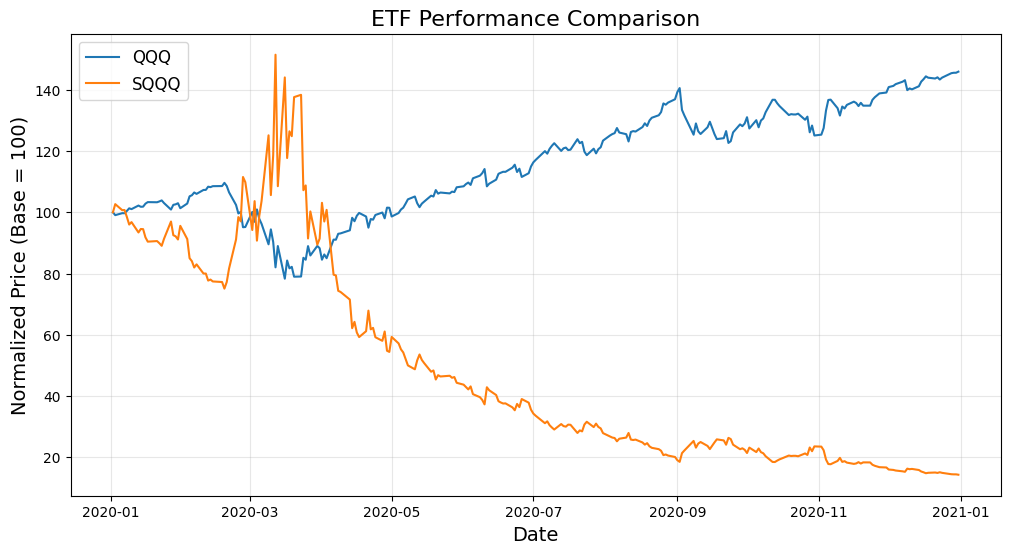

In [2]:

def plot_etfs_comparison(tickers, start_date, end_date):
    """
    Plots a comparison of normalized ETF prices over a specified time period.

    Args:
        tickers (list): List of ETF tickers (e.g., ['QQQ', 'SQQQ']).
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
    """
    try:
        # Download historical data for the tickers
        data = yf.download(tickers, start=start_date, end=end_date, progress=False)

        # Ensure 'Adj Close' or 'Close' column exists
        price_column = "Adj Close" if "Adj Close" in data.columns else "Close"
        if price_column not in data.columns:
            raise KeyError(f"Neither 'Adj Close' nor 'Close' columns found in the data.")

        # Extract the relevant price data
        prices = data[price_column]

        # Normalize prices to start at 100 for better comparison
        normalized_data = (prices / prices.iloc[0]) * 100

        # Plot the normalized data
        plt.figure(figsize=(12, 6))
        for ticker in tickers:
            plt.plot(normalized_data[ticker], label=ticker)

        # Add title, labels, legend, and grid
        plt.title("ETF Performance Comparison", fontsize=16)
        plt.xlabel("Date", fontsize=14)
        plt.ylabel("Normalized Price (Base = 100)", fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
plot_etfs_comparison(['QQQ', 'SQQQ'], '2020-01-01', '2021-01-01')
